In [1]:
# first neural network with keras tutorial
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

import numpy as np
import pandas as pd
import os
import PIL
import PIL.Image
import tensorflow as tf

#from sklearn.model_selection import train_test_split

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    'data/',
    validation_split=0.2,
    subset="training",
    image_size=(28, 28),
    seed=132,
    batch_size=32
)

Found 10000 files belonging to 10 classes.
Using 8000 files for training.


In [3]:
# let's separate train_ds into X_train and y_train

X_train = []
y_train = []

for images, labels in train_ds:
    for image in images:
        X_train.append(image)
    for label in labels:
        y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

In [4]:
val_ds = keras.utils.image_dataset_from_directory(
    'data/',
    validation_split=0.2,
    subset="validation",
    image_size=(28, 28),
    seed=132,
    batch_size=32
)

Found 10000 files belonging to 10 classes.
Using 2000 files for validation.


In [5]:
# checking class names

print(train_ds.class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [6]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 28, 28, 3)
(32,)


In [7]:
# standardize layer

normalization_layer = tf.keras.layers.Rescaling(1./255)

In [8]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

# Assume `x_train` and `y_train` are your training images and labels

# Define the data augmentation
data_augmentation = tf.keras.Sequential([
  preprocessing.Rescaling(1./255),
  preprocessing.RandomRotation(0.1),
  preprocessing.RandomContrast(0.5),
])

# Create empty lists to hold the augmented images and labels
x_train_augmented = []
y_train_augmented = []

# For each image in the training set
for x, y in zip(train_X, train_y):
    # Create 5 augmented versions of the image
    for _ in range(2):
        augmented_image = data_augmentation(tf.expand_dims(x, 0), training=True)
        x_train_augmented.append(tf.squeeze(augmented_image).numpy())
        y_train_augmented.append(y)

# Convert the lists to numpy arrays
x_train_augmented = np.array(x_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [9]:
# configure for performance

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
# building our model

model = tf.keras.Sequential([
  # normalization_layer,

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(40, activation='relu'),
  tf.keras.layers.Dense(40, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile (
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
all_callbacks = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

In [18]:
model.fit(
    x_train_augmented,
    y_train_augmented,
    validation_data=val_ds,
    callbacks=[all_callbacks],
    epochs=20
)

Epoch 1/20
500/500 [==============================] - 2s 4ms/step - loss: 0.1521 - accuracy: 0.9550 - val_loss: 32.1824 - val_accuracy: 0.9605
Epoch 2/20
500/500 [==============================] - 2s 4ms/step - loss: 0.1209 - accuracy: 0.9643 - val_loss: 29.0040 - val_accuracy: 0.9595
Epoch 3/20
500/500 [==============================] - 2s 4ms/step - loss: 0.1098 - accuracy: 0.9669 - val_loss: 36.1885 - val_accuracy: 0.9565
Epoch 4/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0862 - accuracy: 0.9753 - val_loss: 39.9484 - val_accuracy: 0.9630
Epoch 5/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0917 - accuracy: 0.9734 - val_loss: 33.2262 - val_accuracy: 0.9695
Epoch 6/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0620 - accuracy: 0.9812 - val_loss: 45.0164 - val_accuracy: 0.9630
Epoch 7/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0786 - accuracy: 0.9754 - val_loss: 54.4044 - val_accuracy: 0.9660

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


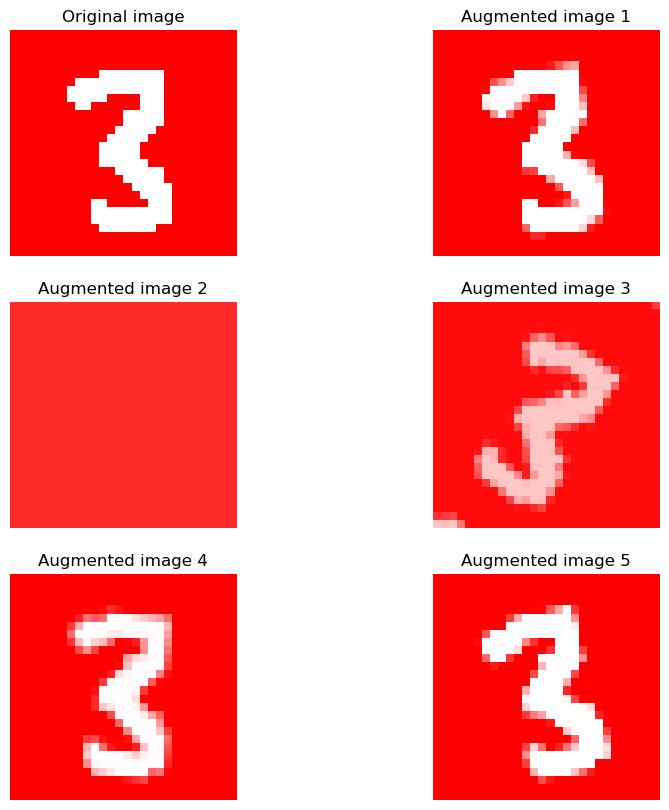

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assume `data_augmentation` is your Sequential model containing the data augmentation layers
# Assume `x_train` is your training data

# Choose the first image from the training data
image = train_X[0]

# Apply the data augmentation to the image 5 times
augmented_images = [data_augmentation(tf.expand_dims(image, 0), training=True) for _ in range(5)]

# Remove the extra dimension added by tf.expand_dims
augmented_images = [tf.squeeze(img).numpy() for img in augmented_images]

# Plot the original image and the augmented images
plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(3, 2, i + 1)
    if i == 0:
        plt.imshow(image)
        plt.title("Original image")
    else:
        plt.imshow(augmented_images[i - 1])
        plt.title(f"Augmented image {i}")
    plt.axis("off")